# Hierarchical Clustering

In [1]:
import warnings
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
# Suppress memory leak warnings.
warnings.filterwarnings("ignore", category=UserWarning, module='sklearn')

In [3]:
# Define possible dataset paths.
paths = [
    '../datasets/_integrated_data/dropped-column-if-missing-value/data.csv',                    # 0
    '../datasets/_integrated_data/dropped-column-if-missing-value/data-gendered.csv',           # 1
    '../datasets/_integrated_data/dropped-row-if-missing-value/data.csv',                       # 2
    '../datasets/_integrated_data/dropped-row-if-missing-value/data-gendered.csv',              # 3
    '../datasets/_integrated_data/missing-pollutant-values-as-NA/data.csv',                     # 4
    '../datasets/_integrated_data/missing-pollutant-values-as-NA/data-gendered.csv',            # 5
    '../datasets/_integrated_data/missing-pollutant-values-as-NaN/data.csv',                    # 6
    '../datasets/_integrated_data/missing-pollutant-values-as-NaN/data-gendered.csv',           # 7
    '../datasets/_integrated_data/missing-pollutant-values-filled-somehow/data.csv',            # 8
    '../datasets/_integrated_data/missing-pollutant-values-filled-somehow/data-gendered.csv'    # 9
]

# Choose a dataset.
chosen_dataset = 8

# Load the data
df = pd.read_csv(paths[chosen_dataset])

# Count of number of pollutant features in the dataset
column_list = ['CO ppm', 'NO pphm', 'NO2 pphm', 'OZONE pphm', 'PM10 µg/m³', 'SO2 pphm']
n_pollutants = sum([1 for col in df.columns if col in column_list])

# Show the dataset
print(f"Dataset shape: {df.shape}")
print(f"Number of pollutant features: {n_pollutants}")
df.describe()

Dataset shape: (130, 16)
Number of pollutant features: 6


,CO ppm,NO pphm,NO2 pphm,OZONE pphm,PM10 µg/m³,SO2 pphm,asthma deaths,asthma edp,asthma hospitalisations,asthma pic,copd deaths,copd hospitalisations,iap deaths,iap hospitalisations
count,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000
mean,0.131643,0.547513,0.585202,1.854216,18.511935,0.068814,0.759615,363.168462,111.835833,8964.038462,25.509231,223.239231,8.498846,324.651538
std,0.067768,0.671731,0.326022,0.249853,3.468044,0.038708,0.241591,133.023553,32.369546,1711.960536,7.744691,81.116937,2.250424,84.065457
min,0.000000,0.055302,0.173631,1.279167,11.923039,0.000000,0.300000,126.000000,51.775000,4650.000000,9.400000,60.500000,4.200000,156.300000
25%,0.097635,0.190634,0.327954,1.711455,16.729167,0.039810,0.650000,256.100000,89.462500,7887.500000,19.225000,162.300000,6.981250,274.200000
50%,0.130381,0.342790,0.506030,1.861842,18.511935,0.068814,0.650000,357.050000,108.675000,9187.500000,26.950000,232.000000,8.375000,322.100000
75%,0.175000,0.632921,0.767641,2.019923,18.981145,0.091701,0.868750,448.237500,129.791667,9971.875000,30.356250,266.700000,9.975000,367.775000
max,0.326036,3.079731,1.569617,2.411666,30.798971,0.189220,1.425000,740.700000,220.258333,14187.500000,51.300000,412.000000,15.000000,540.200000


In [4]:
# Extract features and scale them
df = df.drop(columns=['financial year', 'lhd'])
features = df.iloc[:, :n_pollutants]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

Optimal number of clusters: 10
Silhouette score: 0.3479438391078175


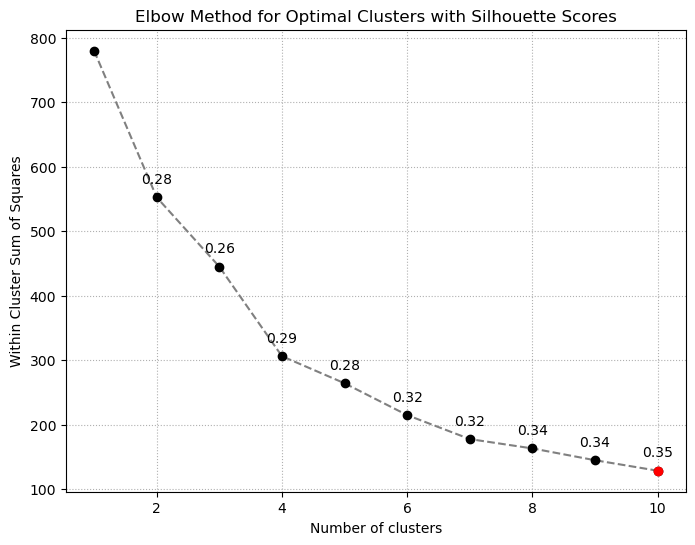

In [5]:
# Determine the optimal number of clusters using the Elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

# Calculate the silhouette scores for different numbers of clusters
silhouette_scores = []
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(scaled_features)
    silhouette_avg = silhouette_score(scaled_features, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plotting the elbow method graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, '--', color='grey')
plt.scatter(range(1, 11), wcss, color='black', zorder=5)
plt.title('Elbow Method for Optimal Clusters with Silhouette Scores')
plt.xlabel('Number of clusters')
plt.ylabel('Within Cluster Sum of Squares')
plt.grid(True, linestyle=':')

# Annotate silhouette scores on the elbow method graph
for i, txt in enumerate(silhouette_scores, start=2):
    plt.annotate(f'{txt:.2f}', (i, wcss[i-1]), textcoords="offset points", xytext=(0,10), ha='center')

# Highlight the point with the highest silhouette score
max_silhouette_score = max(silhouette_scores)
max_silhouette_index = silhouette_scores.index(max_silhouette_score) + 2
plt.scatter(max_silhouette_index, wcss[max_silhouette_index - 1], color='red', zorder=5)

# Set optimal number of clusters based on the silhouette scores
optimal_clusters = max_silhouette_index

# Show the plot and initial results
print(f'Optimal number of clusters: {optimal_clusters}')
print(f'Silhouette score: {max_silhouette_score}')
plt.show()

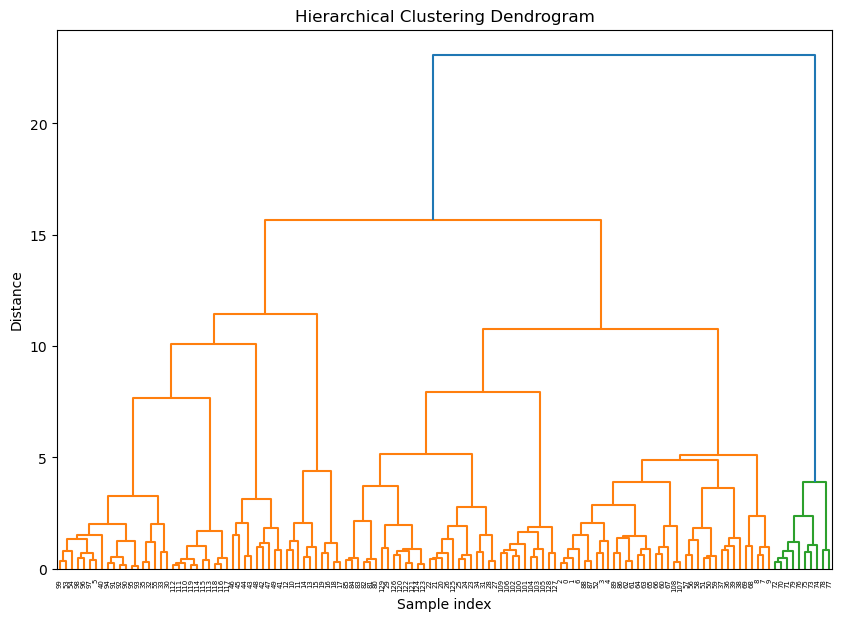

TypeError: AgglomerativeClustering.__init__() got an unexpected keyword argument 'affinity'

In [6]:
# Compute the linkage matrix
linked = linkage(scaled_features, method='ward')

# Create a dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

# Apply Agglomerative Clustering to form actual clusters
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
labels = model.fit_predict(data_scaled)